In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [48]:
X, y = make_classification(n_samples=500,
                           n_features=2,           # keep 2 for 2D visualization
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=2, # multiple clusters per class
                           class_sep=1.5,          # low separation = overlap
                           flip_y=0.10,            # add some noise
                           random_state=42)



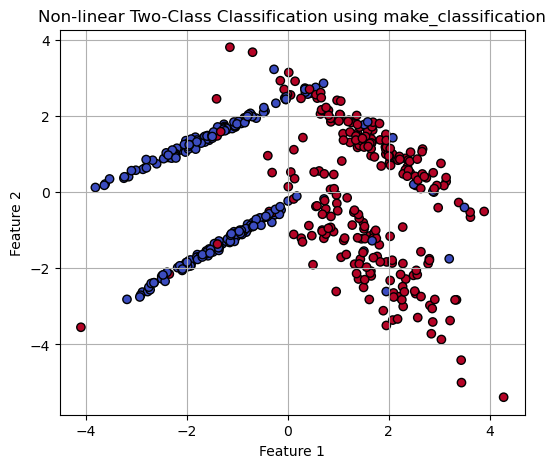

In [49]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Non-linear Two-Class Classification using make_classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

## Without Regularization

In [55]:
model=Sequential()

model.add(Dense(8,activation='relu',input_shape=(2,)))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
history = model.fit(x_train,y_train,epochs=25,batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/25


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8145 - loss: 0.5114 - val_accuracy: 0.8800 - val_loss: 0.3724
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9439 - loss: 0.2344 - val_accuracy: 0.8667 - val_loss: 0.3778
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9151 - loss: 0.2912 - val_accuracy: 0.8667 - val_loss: 0.3760
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9333 - loss: 0.2315 - val_accuracy: 0.8667 - val_loss: 0.3850
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.2508 - val_accuracy: 0.8667 - val_loss: 0.3884
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9192 - loss: 0.3019 - val_accuracy: 0.8667 - val_loss: 0.3881
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9318 - loss: 0.2504 - val_accuracy: 0.8533 - val_loss: 0.4003
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9203 - loss: 0.2522 - val_accuracy: 0.8667 - val_loss: 0.3914
Epo

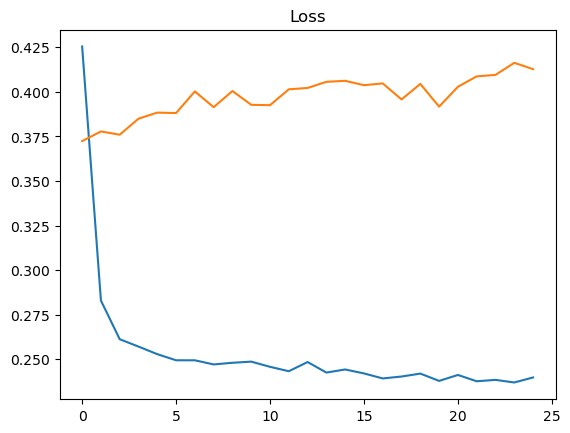

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:


# 1. create a meshgrid over your feature space
def plot_decision_boundary(model, X, y, steps=1000, cmap='coolwarm'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))

    # 2. flatten grid and predict over it
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    # 3. plot decision boundary
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap=cmap, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.grid(True)
    plt.show()


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 15s 483us/step


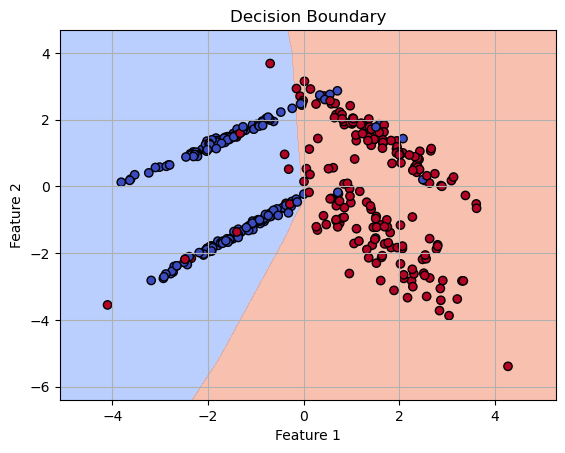

In [60]:
plot_decision_boundary(model,x_train,y_train)

## L1 Regularization

In [63]:
from tensorflow.keras.regularizers import l1

In [69]:
model_l1 = Sequential()
model_l1.add(Dense(8,activation='relu',input_shape=(2,),kernel_regularizer=l1(0.3)))
model_l1.add(Dense(4,activation='relu'))
model_l1.add(Dense(1,activation='sigmoid'))

/home/hamza/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model_l1.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
history = model_l1.fit(x_train,y_train,epochs=25,batch_size=10,validation_split=0.2,verbose=1)

Epoch 1/25


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6876 - loss: 2.1900 - val_accuracy: 0.8667 - val_loss: 1.1684
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9381 - loss: 0.9106 - val_accuracy: 0.8667 - val_loss: 0.5960
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9400 - loss: 0.4675 - val_accuracy: 0.8533 - val_loss: 0.4903
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9411 - loss: 0.3887 - val_accuracy: 0.8800 - val_loss: 0.4727
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9027 - loss: 0.4377 - val_accuracy: 0.8667 - val_loss: 0.4750
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8761 - loss: 0.4437 - val_accuracy: 0.8667 - val_loss: 0.4708
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.3798 - val_accuracy: 0.8667 - val_loss: 0.4517
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.3689 - val_accuracy: 0.8400 - val_loss: 0.4676
Epo

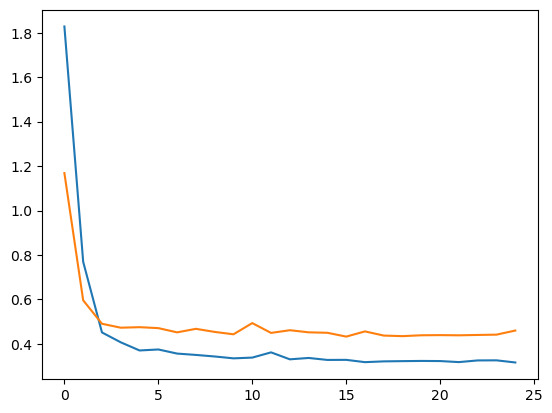

In [72]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.show()

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 546us/step


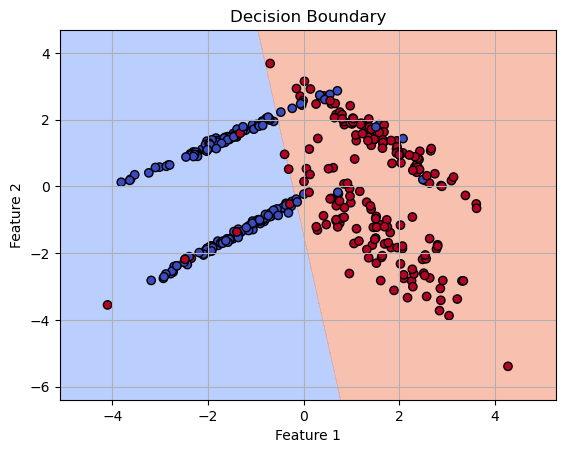

In [73]:
plot_decision_boundary(model_l1,x_train,y_train)

## L2 Regularization

In [74]:
from tensorflow.keras.regularizers import l2

In [76]:
model_l2 = Sequential()

model_l2.add(Dense(8,activation='relu',input_shape=(2,),kernel_regularizer=l2(0.3)))
model_l2.add(Dense(4,activation='relu'))
model_l2.add(Dense(1,activation='sigmoid'))

/home/hamza/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model_l2.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
history = model_l2.fit(x_train,y_train,verbose=1,epochs=25,batch_size=10,validation_split=0.2)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7512 - loss: 1.1230 - val_accuracy: 0.8533 - val_loss: 0.6313
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8957 - loss: 0.5316 - val_accuracy: 0.8800 - val_loss: 0.4272
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9339 - loss: 0.3128 - val_accuracy: 0.8800 - val_loss: 0.4057
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.2850 - val_accuracy: 0.8800 - val_loss: 0.4066
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9477 - loss: 0.2609 - val_accuracy: 0.8800 - val_loss: 0.4049
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9199 - loss: 0.3291 - val_accuracy: 0.8800 - val_loss: 0.4041
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9411 - loss: 0.2814 - val_accuracy: 0.8400 - val_loss: 0.3951
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9322 - loss: 0.2931 - val_accuracy: 0.8800 - val_loss:

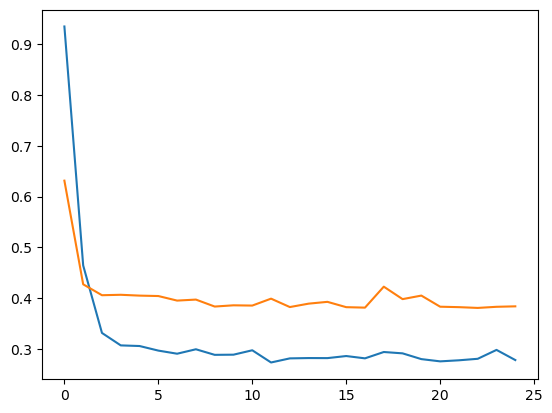

In [79]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.show()

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 15s 486us/step


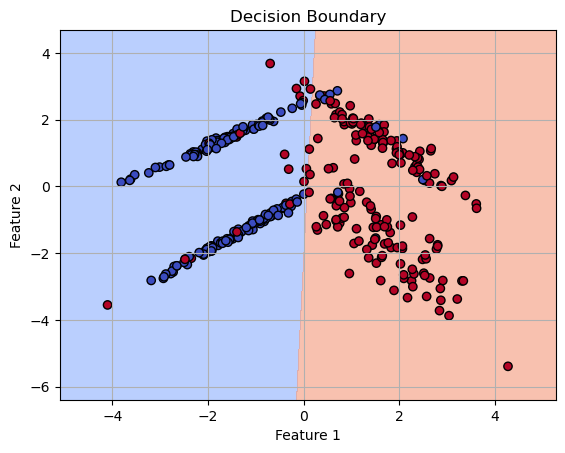

In [80]:
plot_decision_boundary(model_l2,x_train,y_train)